In [1]:
# from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

from env import host, user, password

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [2]:
url = get_db_url("grocery_db")

sql = '''
select * from grocery_customers
'''

df = pd.read_sql(sql,url, index_col="customer_id")

In [5]:
# Lowercase all columns.
columns = [col.lower() for col in df.columns]
df.columns = columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   channel           440 non-null    int64
 1   region            440 non-null    int64
 2   fresh             440 non-null    int64
 3   milk              440 non-null    int64
 4   grocery           440 non-null    int64
 5   frozen            440 non-null    int64
 6   detergents_paper  440 non-null    int64
 7   delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 30.9 KB


In [9]:
df

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867


In [7]:
df.region.value_counts()

3    316
1     77
2     47
Name: region, dtype: int64

In [10]:
region_3 = df[df.region == 3]

In [12]:
region_3.describe().T

,count,mean,std,min,25%,50%,75%,max
channel,316.0,1.332278,0.471777,1.0,1.00,1.0,2.00,2.0
region,316.0,3.000000,0.000000,3.0,3.00,3.0,3.00,3.0
fresh,316.0,12533.471519,13389.213115,3.0,3350.75,8752.5,17406.50,112151.0
milk,316.0,5977.085443,7935.463443,55.0,1634.00,3684.5,7198.75,73498.0
grocery,316.0,7896.363924,9537.287778,3.0,2141.50,4732.0,10559.75,92780.0
frozen,316.0,2944.594937,4260.126243,25.0,664.75,1498.0,3354.75,36534.0
detergents_paper,316.0,2817.753165,4593.051613,3.0,251.25,856.0,3875.75,40827.0
delicassen,316.0,1620.601266,3232.581660,3.0,402.00,994.0,1832.75,47943.0


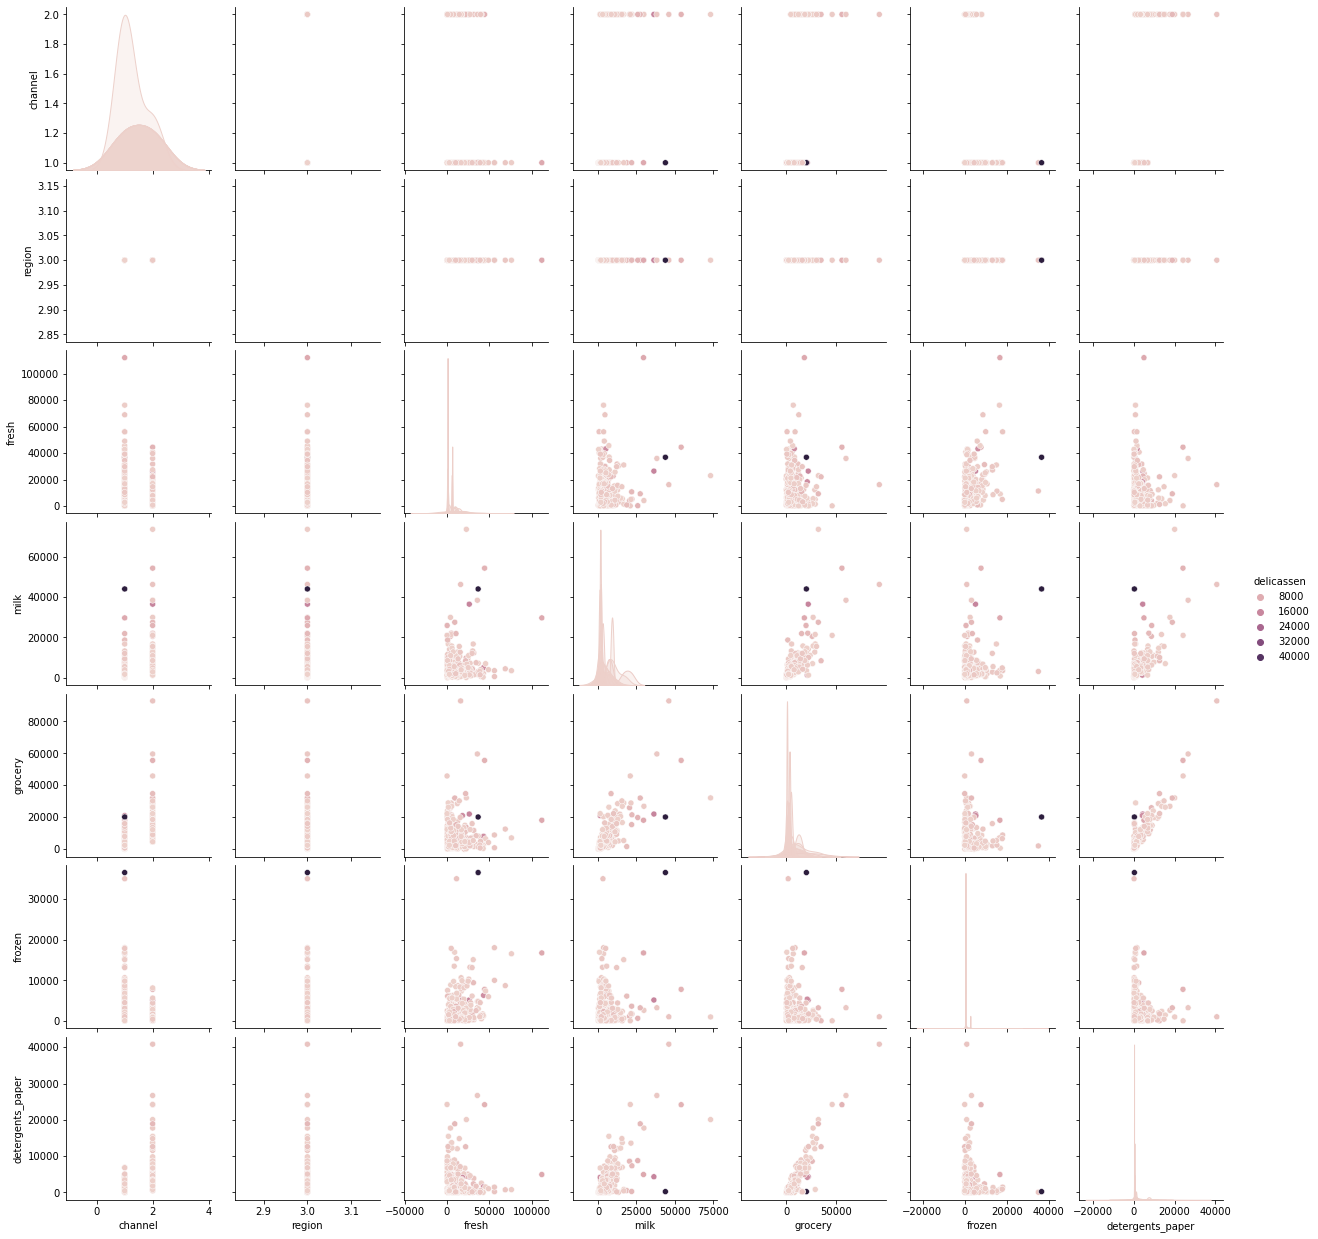

In [15]:
sns.pairplot(data=region_3, hue='delicassen')